# Timepix Data Analysis

## TOF data

### Import few libraries

In [1]:
from timepixhdf.run import TimePixRun, Filter
from timepixhdf.tof import Tof

In [2]:
#timepix_hdf_filename = "./data/run_0178_20191213-1254.hdf5"
timepix_hdf_filename = "./timepix_ion-run6_CO2_0000_20210507-1321.hdf5"
timepix_run = TimePixRun(timepix_hdf_filename)

### Extract data
Timepix data has two types of events
1. raw
2. centroid

We need to pass `event type`.

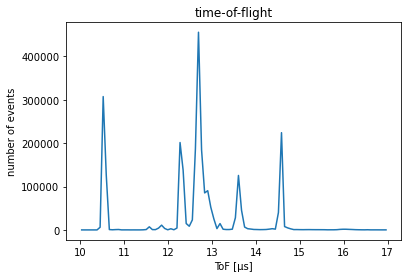

In [3]:
timepix_dict = timepix_run.get_events("raw", ["tof"], Filter("tof", 10.0E-06, 17.0E-06))
tof = timepix_dict["tof"]

# Now plot tof data. 'Tof' function is just a matplotlib script.
Tof(tof, time_unit="micro")

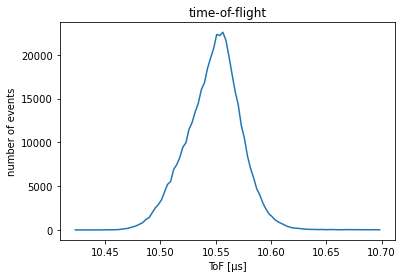

In [4]:
timepix_dict = timepix_run.get_events("raw", ["tof"], Filter("tof", 10.3E-06, 10.7E-06))
tof = timepix_dict["tof"]
Tof(tof, time_unit="micro")

## VMI data

In [5]:
from timepixhdf.vmi import VmiImage

In [6]:
#timepix_dict = timepix_run.get_events("centroided", ["x", "y"], fragment="fragments,test_ion")
timepix_dict = timepix_run.get_events("centroided", ["x", "y"], Filter("tof", 10.3E-06, 10.7E-06), Filter("x", 0, 255), Filter("y", 0, 255))
x, y = timepix_dict["x"], timepix_dict["y"]

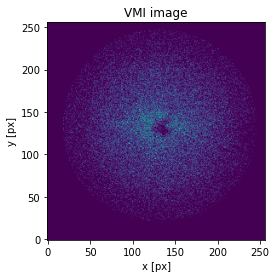

In [7]:
vmi_image = VmiImage(x,y)
vmi_image.show()